****Counting Rice Grain****

***This Notebook Aims to solve two objectives:***

Objective 1: Count the number of rice grains in the Image.
Objective 2: Find the number of broken grains in the image.

In [56]:
#importing the requred librarirs for solving the problem statement
import cv2 as cv #for image preprocessing
from matplotlib import pyplot as plt # for image visulization
from scipy import ndimage # for multidimentional image processing
from numpy import asarray # for working with image pixels
import matplotlib.image as mpimg
from PIL import Image 
from skimage import filters, feature, measure, color#extracting the features from the images
import numpy as np # for working with numpy array
import cv2 #for showing image

****1-Count the number of rice grains in the Image****

In [57]:
#reading the image from the folder
IMG = cv2.imread("Desktop/data/test/image_1.jpg")

In [58]:
#creating the function for showing the image with colur on x and y co-ordinate
def show(image,x=25,y=10):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#background colour
  plt.figure(figsize=(x,y))
  plt.imshow(img)

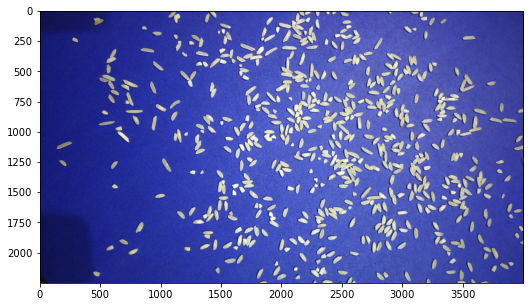

In [59]:
show(IMG,20,5)#x,y dimensions for showing image

In [60]:
#converting the image into the grayscale image for the seperation the pixel with the black colour background
grayscale_image = cv2.cvtColor(IMG, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(grayscale_image, 120, 255, cv2.THRESH_BINARY)

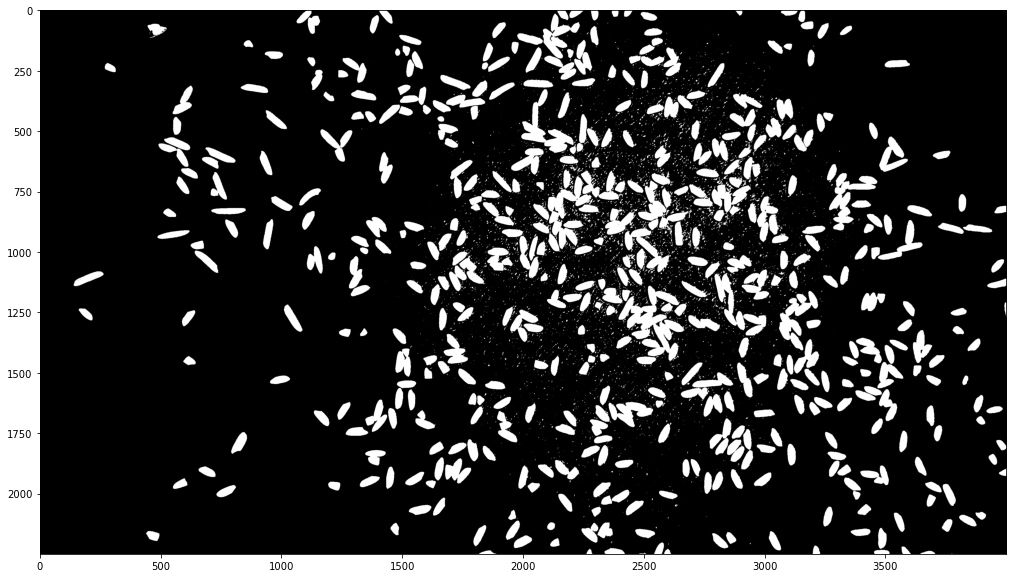

In [61]:
show(thresh_img)#seperate the pixel with black background
#in this this image there are many white dots so we have to remove them if we keep them then it is difficult to count the grains which are also in the white colour

In [62]:
#cleaning the image i.e removing the all white dots from the image for better visulization of the rice grains
#using morphologyEx function removing the dots

In [63]:
kernel = np.ones((3),np.uint8)#defined the kerenal to capture the white dots i.e white dots by using numpy 
Clear_Image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=10)#used 10 itration for increasing the size of dots

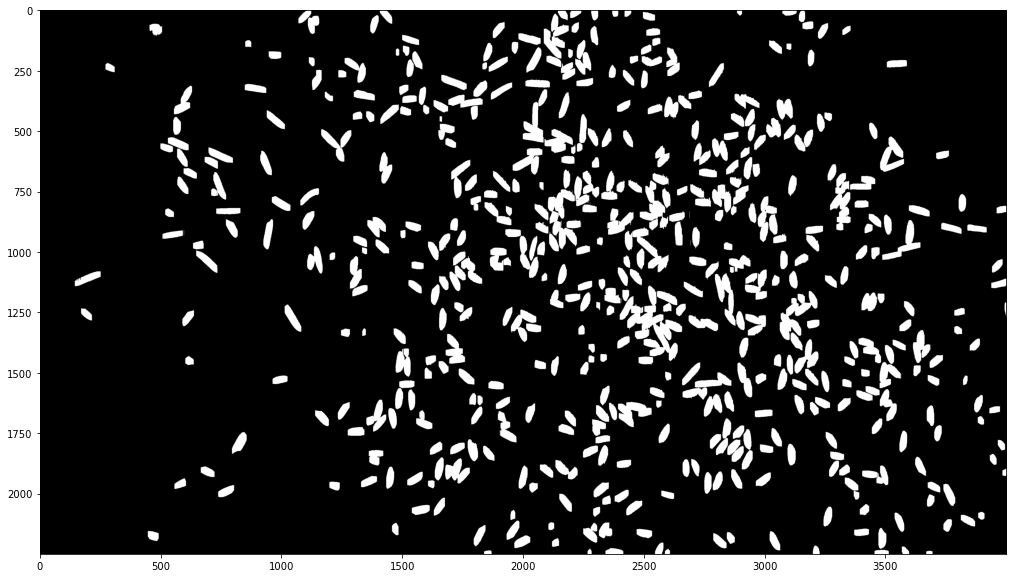

In [64]:
#showing the noise free image
show(Clear_Image)

****Counting the all grains****

In [65]:
#1--counting the grains using counter method

In [66]:
#applying cv counter method for counting the rice grains
contours, hierarchy = cv.findContours(Clear_Image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(Clear_Image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 515


In [67]:
#there are 515 total no of rice grains in the image

In [68]:
#there is touching grains in the image in the couter method it take the touching grain as a single grains
#for fixing above proble we use WaterShed Algorithm in this algorithm it detect the fix bpundaries of the grain

In [69]:
#importing the algorithm
from skimage.segmentation import watershed

In [70]:
#applying  distance_transform_edt to computes the distance from non-zero points to the nearest zero point.
dist_trans = ndimage.distance_transform_edt(Clear_Image)
#applying peak_local_max function for getting coordinates of local peaks in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)
local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True
#aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=Clear_Image) #seperating the joined corners

Total no of Rice grains are : 580


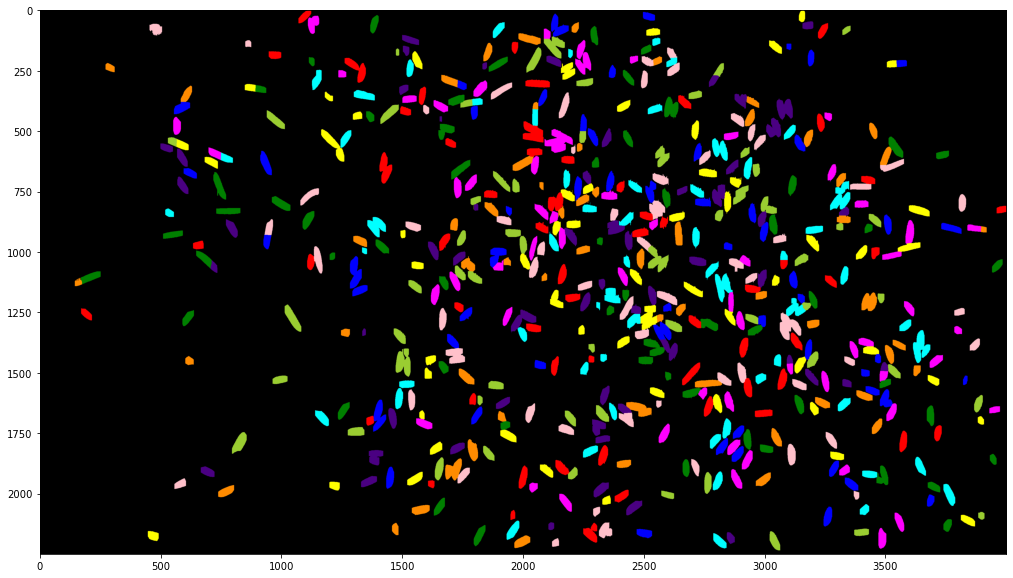

In [71]:
#counting the no of grains by using above algorithm
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))#specifing the background
print("Total no of Rice grains are : %d" % labels.max())

****There are total no of rice grains by WaterShed Algorithm are 580 and by using counter method it is 515 
the above algorithm seperates the all grains which are touching it means there are 65 grains are touching to each other****

****Counting Broken Rice Grains****  

In [72]:
#after the analysis 800 is the max area of the grain partical below that area are the broken grain

In [73]:
#creating a list of grain area . while calculating the grain calculate the area of a grain if the area is less than 800 then storing it into the count and showing the length of grain
count = []
for x in contours:
  #Using contourArea method to get the area of rice 
  area = cv.contourArea(x)#storing the area of each grain into x
  if area < 800 :
    count.append(x)
print("no of broken grain in the image: ",len(count))

no of broken grain in the image:  84


****In the first image there are 580 total grains and 84 broken grain****

****Repeating the above procedure for all the grain and storing it into the pandas dataframe****

In [74]:
IMG_2 = cv2.imread("Desktop/data/test/image_2.jpg")
def show(image,x=25,y=10):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [75]:
grayscale_image_2 = cv2.cvtColor(IMG_2, cv2.COLOR_BGR2GRAY)
ret, thresh_img_2 = cv2.threshold(grayscale_image_2, 120, 255, cv2.THRESH_BINARY)

In [76]:
kernel = np.ones((3),np.uint8)#defined the kerenal to extracting the noise i.e white dots by using numpy 
Clear_Image_2 = cv2.morphologyEx(thresh_img_2,cv2.MORPH_OPEN, kernel, iterations=10)

In [77]:
#applying cv counter method for counting the rice grains
contours, hierarchy = cv.findContours(Clear_Image_2, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(Clear_Image_2, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 529


In [78]:
#Applying  distance_transform_edt to computes the distance from non-zero points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(Clear_Image_2)

#Applying peak_local_max function for getting coordinates of local peaks in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=Clear_Image_2) # separate merged corns
print("Number of Rice grains are : %d" % labels.max())

Number of Rice grains are : 594


In [79]:
#creating a list of grain area . while calculating the grain calculate the area of a grain if the area is less than 800 then storing it into the count and showing the length of grain
count = []
for x in contours:
  #Using contourArea method to get the area of rice 
  area = cv.contourArea(x)#storing the area of each grain into x
  if area < 800 :
    count.append(x)
print("no of broken grain in the image: ",len(count))

no of broken grain in the image:  144


****In the second image total no of rice grains are 594 and briken are 144****

In [80]:
#iamge3

In [81]:
IMG_3 = cv2.imread("Desktop/data/test/image_3.jpg")
def show(image,x=25,y=10):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grayscale_image = cv2.cvtColor(IMG_3, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(grayscale_image, 120, 255, cv2.THRESH_BINARY)
kernel = np.ones((3),np.uint8)
Clear_Image_3 = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=10)
contours, hierarchy = cv.findContours(Clear_Image_3, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(Clear_Image_3, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))
dist_trans = ndimage.distance_transform_edt(Clear_Image_3)
local_max = feature.peak_local_max(dist_trans, min_distance=23)
local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=Clear_Image_3)
print("Number of Rice grains are : %d" % labels.max())
count = []
for x in contours:
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)
print("no of broken grain in the image: ",len(count))

Number of detected contours 615
Number of Rice grains are : 610
no of broken grain in the image:  218


****In the Third image total no of rice grains are 615 and briken are 218****

In [82]:
IMG_4 = cv2.imread("Desktop/data/test/image_4.jpg")
def show(image,x=25,y=10):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grayscale_image_4 = cv2.cvtColor(IMG_4, cv2.COLOR_BGR2GRAY)
ret, thresh_img_4 = cv2.threshold(grayscale_image_4, 120, 255, cv2.THRESH_BINARY)
kernel = np.ones((3),np.uint8)
Clear_Image_4 = cv2.morphologyEx(thresh_img_4,cv2.MORPH_OPEN, kernel, iterations=10)
contours, hierarchy = cv.findContours(Clear_Image_4, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(Clear_Image_4, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))
dist_trans = ndimage.distance_transform_edt(Clear_Image_4)
local_max = feature.peak_local_max(dist_trans, min_distance=23)
local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=Clear_Image_4) 
print("Number of Rice grains are : %d" % labels.max())
count = []
for x in contours:
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)
print("no of broken grain in the image: ",len(count))

Number of detected contours 641
Number of Rice grains are : 691
no of broken grain in the image:  219


****In the Fourth image total no of rice grains are 691 and briken are 219****

In [83]:
IMG_5 = cv2.imread("Desktop/data/test/image_5.jpg")
def show(image,x=25,y=10):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grayscale_image_5 = cv2.cvtColor(IMG_5, cv2.COLOR_BGR2GRAY)
ret, thresh_img_5 = cv2.threshold(grayscale_image_5, 120, 255, cv2.THRESH_BINARY)
kernel = np.ones((3),np.uint8)
Clear_Image_5 = cv2.morphologyEx(thresh_img_5,cv2.MORPH_OPEN, kernel, iterations=10)
contours, hierarchy = cv.findContours(Clear_Image_5, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(Clear_Image_5, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))
dist_trans = ndimage.distance_transform_edt(Clear_Image_5)
local_max = feature.peak_local_max(dist_trans, min_distance=23)
local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=Clear_Image_5)
print("Number of Rice grains are : %d" % labels.max())
count = []
for x in contours:
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)
print("no of broken grain in the image: ",len(count))

Number of detected contours 519
Number of Rice grains are : 702
no of broken grain in the image:  71


****In the Fifth image total no of rice grains are 702 and briken are 71****

In [84]:
#creating dataframe for the submission

In [85]:
import pandas as pd

In [86]:
data = {'file_name':['image_1.jpg', 'image_2.jpg', 'image_3.jpg', 'image_4.jpg','image_5.jpg'], 'total_rice_grain':[580, 594, 610, 691, 702],'total_broken_rice_grain':[84, 144, 218, 219, 71]}

In [87]:
df = pd.DataFrame(data)

In [88]:
df

,file_name,total_rice_grain,total_broken_rice_grain
0,image_1.jpg,580,84
1,image_2.jpg,594,144
2,image_3.jpg,610,218
3,image_4.jpg,691,219
4,image_5.jpg,702,71


In [89]:
#saving the dataframe
df.to_csv("submission.csv")